<a href="https://colab.research.google.com/github/goyaljai1/Data_Analysis_Projects/blob/main/Case_Study_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Income Dataset Casestudy

In [1]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d wenruliu/adult-income-dataset

100% 652k/652k [00:00<00:00, 2.47MB/s]
100% 652k/652k [00:00<00:00, 2.47MB/s]


In [3]:
!unzip '/content/adult-income-dataset.zip'

Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


In [36]:
import matplotlib as plt 
import seaborn as sns

In [37]:
#converting csv to dataset
import pandas as pd
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [38]:
df.shape

(48842, 15)

In [39]:
#50% random rows from the dataset
df.sample(frac = 0.5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
16175,55,Local-gov,258121,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,40,United-States,>50K
12898,30,Private,177437,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
31676,34,Private,420749,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,Germany,<=50K
35768,29,Private,383745,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1887,30,United-States,>50K
304,20,Private,109667,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,16,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,51,Local-gov,289390,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,40,United-States,>50K
39449,22,Private,54825,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
43526,43,Private,289669,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,2547,40,United-States,>50K
35383,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,<=50K


In [ ]:
#repace '?' from the dataset to np.nan
import numpy as np
for x in df.columns:
  df[x].replace('?', np.nan, inplace= True)
df.tail(20)

In [ ]:
df.isin(['?']).sum()

<Axes: >

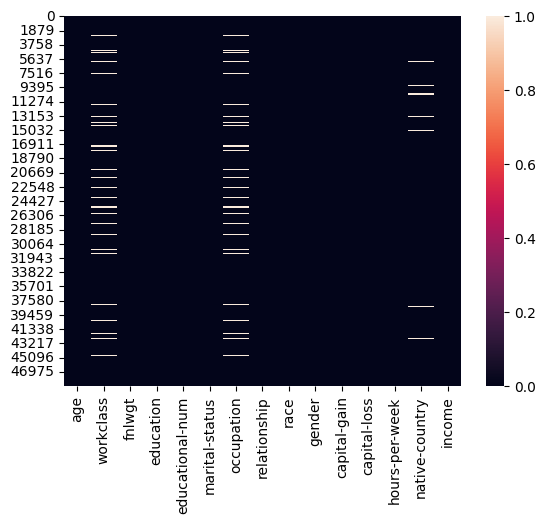

In [42]:
#heatmap visualization of the null values

sns.heatmap(df.isnull())

In [43]:
# % missing data
(df.isnull().sum()/len(df))*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [44]:
df.shape

(48842, 15)

In [45]:
df.dropna(how = 'any', inplace = True)
df.shape

(45222, 15)

In [47]:
#total duplicated values
df.duplicated().sum()

47

In [48]:
#drop duplicated values
df.drop_duplicates(inplace = True)
df.shape

(45175, 15)

In [50]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [51]:
#drop the columns education-num, capital-gain and capital loss
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [53]:
df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1, inplace = True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


**Univariate Analysis**

In [55]:
#distribution of column age

df['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

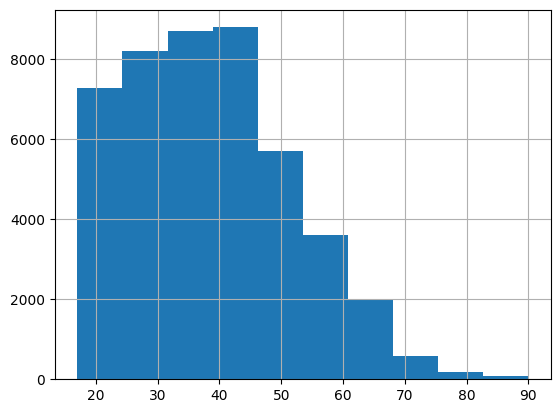

In [56]:
df['age'].hist()

In [60]:
#total number of person having age between 17 to 48

sum(df['age'].between(17,48))

34858

In [61]:
#distribution of workclass column

df['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

<Axes: >

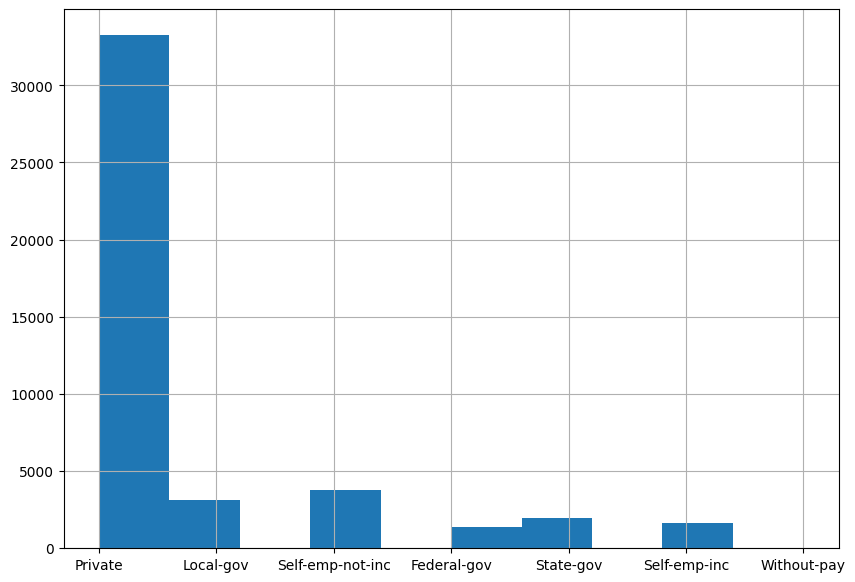

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
df['workclass'].hist()

In [71]:
#number of persons having bachelors or masters degree

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [76]:
print(sum(df['education']=='Bachelors'))
print(sum(df['education']=='Masters'))  

2513

**Bivariate Analysis**

<Axes: xlabel='income', ylabel='age'>

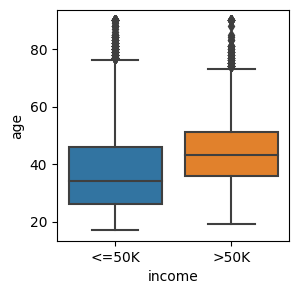

In [80]:
plt.figure(figsize=(3,3))
sns.boxplot(x='income', y='age', data=df)

In [83]:
#replacing income

df['income'].replace(['<=50K', '>50K'],[0,1], inplace = True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


In [92]:
df.groupby('workclass')['income'].mean().sort_values(ascending = False).head()

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Name: income, dtype: float64

In [97]:
#who has better chance to get more salary male or female?

df.groupby('gender')['income'].mean().sort_values(ascending = False).head(1)

gender
Male    0.312609
Name: income, dtype: float64

In [99]:
#convert datatype of workclass to categorical type

df['workclass'].value_counts()

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [101]:
df['workclass'] = df['workclass'].astype('category')

In [103]:
type(df['workclass'][0])

str